In [1]:
import requests
from scipy import stats
import h5py
import numpy as np
from velocity import get
from velocity.velocity_data import particle_type
from velocity.velocity_data import dm_mass
from velocity.velocity_data import find_circ_vel
from velocity.velocity_data import star_pos_vel
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
baseUrl = 'http://www.tng-project.org/api/'
headers = {"api-key":"47e1054245932c83855ab4b7af6a7df9"}


id = 25822
redshift = 2
scale_factor = 1.0 / (1+redshift)
little_h = 0.6774
solar_Z = 0.0127
url = "http://www.tng-project.org/api/TNG50-1/snapshots/z=" + str(redshift) + "/subhalos/" + str(id)

In [3]:
params = {'stars':'Coordinates,Velocities'}

sub = get(url)
saved_filename = get(url+"/cutout.hdf5")

with h5py.File(saved_filename,'r') as f:
    # NOTE! If the subhalo is near the edge of the box, you must take the 
    # periodic boundary into account! (we ignore it here)
    dx = (f['PartType4']['Coordinates'][:,0] - sub['pos_x'])*scalefactor
    dy = (f['PartType4']['Coordinates'][:,1] - sub['pos_y'])*scalefactor
    dz = (f['PartType4']['Coordinates'][:,2] - sub['pos_z'])*scalefactor

    vx = f['PartType4']['Velocities'][:,0]*np.sqrt(scale_factor) - sub['vel_x']
    vy = f['PartType4']['Velocities'][:,1]*np.sqrt(scale_factor) - sub['vel_y']
    vz = f['PartType4']['Velocities'][:,2]*np.sqrt(scale_factor) - sub['vel_z']

    star_masses = f['PartType4']['Masses'][:]*(10**10 / 0.6774)

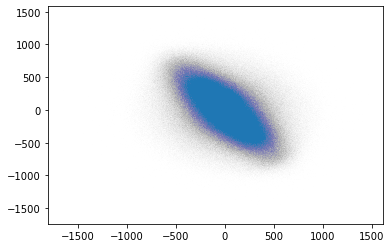

295.11023


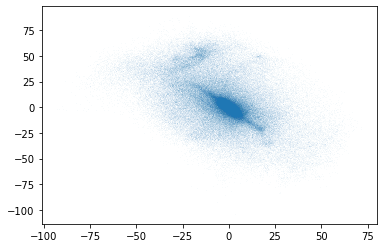

In [14]:
plt.scatter(vx,vy,s=0.01,alpha = 0.01)
plt.show()

print(np.std(vx))

plt.scatter(dx,dy,s=0.01,alpha = 0.1)
plt.show()

In [5]:
x = np.array((dx,dy,dz))
vel = np.array((vx,vy,vz))

In [6]:
vel = np.transpose(vel)
x = np.transpose(x)
print(np.shape(vel))

(1707327, 3)


[      0       1       2 ... 1707072 1707096 1707107]


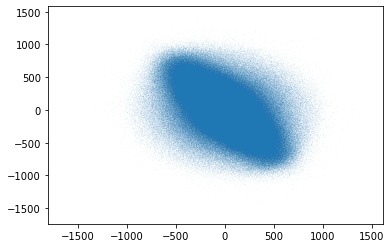

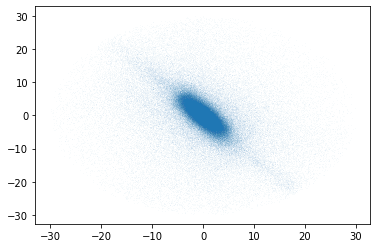

In [12]:
radius = np.sqrt(x[:,0]**2 + x[:,1]**2 + x[:,2]**2)
stars_select = np.where(radius < 30)[0]
print(len(stars_select))
plt.scatter(vel[stars_select, 0], vel[stars_select, 1],s=0.01,alpha = 0.1)
plt.show()

plt.scatter(x[stars_select, 0], x[stars_select, 1],s=0.01,alpha = 0.1)
plt.show()